[1-Introduction](#section1) | [2-Literature Review](#section2) | [3-Research Question](#section3) | [4-Presentation of Data](#section4) | [5-Methodology](#section5) | [6-Results](#section6) | [7-Discussion](#section7) | [8-Conclusion](#section8) | Bibliography(#section9) | [Appendix](#section10)

## <a id="section1"></a> 1 | Introduction

This paper aims to investigate the impact of the Seed Enterprise Investment Scheme (SEIS) on the development and nurturing of businesses in London. Specifically, it explores whether the introduction of SEIS in 2012 has provided positive assistance to start-up enterprises in London. To achieve this, we employ casual inference and regression discontinuity methods to analyze Business Demographics and Survival Rates data for the period 2002 to 2021.

The data used in this analysis is the London Business Demographics and Survival Rates from the [London Datastore](https://data.london.gov.uk/). The data is available at the following link: [https://data.london.gov.uk/dataset/business-demographics-and-survival-rates-borough](https://data.london.gov.uk/dataset/business-demographics-and-survival-rates-borough), containing all the data of enterprise births, deaths, active enterprises and survival rates across boroughs from 2002 to 2021.

Findings at the boroughs level indicates that -------------------- 

the SEIS has had a positive impact on the number of active enterprises in London. The results show that the number of active enterprises in London has increased by 10% since the introduction of the SEIS in 2012. This suggests that the SEIS has been successful in encouraging the development of new businesses in London.

In [2]:
# import all the necessary libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import folium
import contextily as ctx

import os
import glob

## <a id="section2" class="Title-1"></a> 2 | Literature Review

The exploration of traffic congestion patterns and characteristics in urban areas like London has been a subject of considerable research interest in transportation studies. 

Most common approach is the spatio-temporal analysis techniques to identify clusters and trends in congestion levels. Studies(Yang and Wang, 2020) have employed similar methodologies to analyze traffic congestion patterns in cities, providing valuable insights for urban planners and policymakers. 

Regarding the temporal characteristics of congestion, research has investigated the influence of different time measures on traffic patterns. For instance, some studies have examined the impact of weekdays versus weekends and the segmentation within a day on congestion levels(Wen, Sun and Zhang, 2014), highlighting the importance of considering temporal factors in understanding and mitigating traffic congestion in urban areas. 

Furthermore, techniques such as machine learning algorithms and time series analysis have been employed to forecast congestion levels in the short term(Elfar, Talebpour and Mahmassani, 2018). 

In summary, existing literature provides a foundation for the exploration of London's traffic congestion, offering insights into spatial and temporal patterns as well as predictive modeling techniques. Building upon this body of knowledge, the present study aims to contribute to our understanding of the transport situation in London during the specified period.


## <a id="section3" class="Title-1"></a> 3 | Research Question

Even though government policies do play a vital role in shaping the entrepreneurial ecosystem, the key factor for a startup's surviving should still be the macroeconomic environment including supply-demand equilibrium, industry potential, and local currency. 

Therefore, it is essential to exclude all of those factors off when evaluating the effectiveness of SEIS policies, seeking to unravel the extent to which this policy initiative has influenced the birth rates and survival rates of enterprises, furtherly in the different boroughs.

With these objectives in mind, we formulate the following research questions:

- RQ1: Is there a causal relationship between SEIS and enterprise growth in London?

- RQ2: Did the introduction of SEIS in 2012 significantly improve enterprise birth rates and survival rates in London?

- RQ3: Which borough in London experienced the most significant increase in start-up activity after the implementation of SEIS in 2012?

## <a id="section4" class="Title-1"></a> 4 | Presentation of Data

**Data Description**

There are three datasets used in this analysis:

- London Boroughs(.gpkg): Accessed from London Datastore, this geopackage dataset contains information about the 32 boroughs in London, including the name of the borough, the area it covers.

- Business Demographics(.csv): This dataset contains information about the number of active enterprises, along with births and deaths rates from 2004 to 2022.

- Business Survival Rates(.csv): active enterprises, and survival rates across boroughs from 2002 to 2021.


In [48]:
# reading All data and have a look
# read London Boroug gpkg file
LondonBorough = gpd.read_file('Data/London_Boroughs.gpkg')

# read London Business Demographics data
Demographic = pd.read_csv('Data/business-demographics.csv')

# read London Business Survival Rates data
Survival = pd.read_csv('Data/business-survival-rates.csv')

In [68]:
#LondonBorough.sample(5)

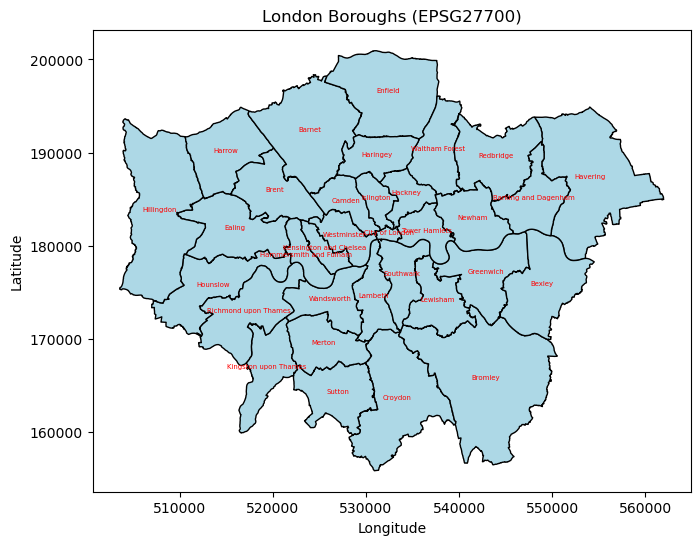

In [34]:
# plot the map of London Boroughs and mark the name of each Borough
fig, ax = plt.subplots(figsize=(8, 6))
LondonBorough.plot(ax=ax, color='lightblue', edgecolor='k')
for x, y, label in zip(LondonBorough.geometry.centroid.x, LondonBorough.geometry.centroid.y, LondonBorough['name']):
    ax.text(x, y, label, fontsize=5, ha='center', color='red')
plt.title('London Boroughs (EPSG27700)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [66]:
#Demographic.sample(5)

In [67]:
#Demographic.info()

In [54]:
# name the first column as 'code' in Demographic data
Demographic.columns = ['code', *Demographic.columns[1:]]

In [65]:
#Survival.sample(5)

**Data Preprocessing**

Merging the datasets: The Business Demographics and Survival Rates datasets were merged based on the borough name and year to create a comprehensive dataset for analysis.

In [64]:
#first we need to merge the Demographic and Survival data based on the 'code' and 'year' columns
# merge the Demographic and Survival data
Business = pd.merge(Demographic, Survival, on=['code', 'year'])
#Business.sample(5)

Cleaning the data: The data was cleaned to remove any odd values and outliers that could affect the analysis. Also, the study period was limited to 2004-2019 to ensure consistency across the datasets and eliminate the impact of Covid-19 pandemic since 2020.

In [63]:
# clean the data by filling all the ":" value with NaN
Business = Business.replace(':', pd.NA)

## <a id="section5" class="Title-1"></a> 5.Methodology

## <a id="section6" class="Title-1"></a> 6.Results

## <a id="section7" class="Title-1"></a> 7.Discussion

## <a id="section8" class="Title-1"></a> 8.Conclusion